# 01 一元线性回归

## 确定问题

根据房屋面积预测房价：
    
    设房屋面积为x，房价为y，此为一元线性回归问题，根据一个特征预测目标值
    
    在其他问题中，训练集中包含多项特征，为多元线性回归问题。

## 建立模型

根据分析，此问题模型为一个简单的一元线性方程 
$y=a x+b$


将训练集中每一个样本点带入该模型，得到样本点$x^{(i)}$的预测值$\hat{y}^{(i)}$  

$\hat{y}^{(i)}=a x^{(i)}+b$

此时，该样本点的真值为$y^{(i)}$

利用真值与预测值之间的误差，为此模型建立目标函数(损失函数or效用函数)：

$\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$

考虑所有样本，并将预测值带入得到Loss Function：

$\sum_{i=1}^{m}\left(y^{(i)}-a x^{(i)}-b\right)^{2}$

我们希望目标函数取值越小越好，也即真值与预测值越贴近模型越准确

Notes：由于我们需要求目标函数最值，所以目标函数最好是连续可导函数

## 模型求解

找到a和b使得Loss Function：$J(a, b)=\sum_{i=1}^{m}\left(y^{(i)}-a x^{(i)}-b\right)^{2}$ 取值最小

此类模型常用求解工具：最小二乘法

分别对J(a,b)求a和b的偏导$\frac{\partial J(a, b)}{\partial a}=0$ $\frac{\partial J(a, b)}{\partial b}=0$，则在偏导数等于0时，函数取得极值。

根据链式求导法则，$\frac{\partial J(a, b)}{\partial b}=\sum_{i=1}^{m} 2\left(y^{(i)}-a x^{(i)}-b\right)(-1)$

从而，$\sum_{i=1}^{m} 2\left(y^{(i)}-a x^{(i)}-b\right)(-1)=0$

也即，$\sum_{i=1}^{m}\left(y^{(i)}-a x^{(i)}-b\right)=0$

进一步:

$\sum_{i=1}^{m} y^{(i)}-a \sum_{i=1}^{m} x^{(i)}-\sum_{i=1}^{m} b=0$



$\sum_{i=1}^{m} y^{(i)}-a \sum_{i=1}^{m} x^{(i)}-m b=0$



$m b=\sum_{i=1}^{m} y^{(i)}-a \sum_{i=1}^{m} x^{(i)}$


    
因此，$b=\overline{y}-a \overline{x}$

同理可得，$a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\overline{x}\right)\left(y^{(i)}-\overline{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\overline{x}\right)^{2}}$


最终当参数a,b确定为以下值时，J(a,b)取最小值，真值与预测值误差最小

$a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\overline{x}\right)\left(y^{(i)}-\overline{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\overline{x}\right)^{2}}$

$b=\overline{y}-a \overline{x}$


## Coding 实现

### for循环方式

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

In [2]:
x_mean = np.mean(x)
y_mean = np.mean(y)
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean)*(y_i - y_mean)
    d += (x_i - x_mean)**2
a = num/d
b = y_mean - a*x_mean
print('a:',a)
print('b:',b)

a: 0.8
b: 0.39999999999999947


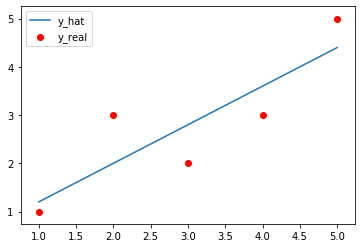

In [3]:
y_hat = a*x + b
plt.plot(x, y_hat,label='y_hat')
plt.scatter(x, y,label='y_real',color='r')
plt.legend()
plt.show()

### 向量化运算方式

In [4]:
import numpy as np
m = 1000000
# 随机数组，一百万个元素
x = np.random.random(size=m)
# 增加噪声作为干扰项
noise = np.random.normal(size=m)
y = x * 2.0 + 3.0 + noise

In [5]:
def for_fit_method(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = 0.0
    d = 0.0
    for x_i,y_i in zip(x,y):
        num += (x_i - x_mean)*(y_i - y_mean)
        d += (x_i - x_mean)**2
    a = num/d
    b = y_mean - a*x_mean
    return a,b

In [6]:
def vector_fit_method(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = (x-x_mean).dot(y-y_mean)
    d = (x - x_mean).dot(x - x_mean)
    a = num/d
    b = y_mean - a*x_mean
    return a,b

In [7]:
# 两种方式性能比较，向量化领先将近一百倍
%timeit for_fit_method(x,y)
%timeit vector_fit_method(x,y)

803 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.5 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 衡量指标

### MSE

Mean Squared Error

均方误差

$\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}$

In [8]:
def mean_squared_error(y_true,y_predict):
    np.sum((y_true-y_predict)**2) / len(y_true)

### RMSE

Root Mean Squared Error

均方根误差

$\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}}=\sqrt{M S E_{t e s t}}$

In [9]:
from math import sqrt
def root_mean_squared_error(y_true,y_predict):
    return sqrt(mean_squared_error(y_true,y_predict))

### MAE

Mean Absolute Error

平均绝对误差

$\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|$

In [10]:
def mean_absolute_error(y_true,y_predict):
    return np.sum(abs(y_true-y_predict)) / len(y_true)

### R Square

$R^{2}=1-\frac{S S_{\text {residual}}}{S S_{\text {total}}}=1-\frac{\sum_{i}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}}{\sum_{i}\left(\overline{y}-y^{(i)}\right)^{2}}$

$S S_{\text {residual}}$ : residual sum of squares：
    
   * 使用我们的模型：$\hat{y}^{(i)}=a x^{(i)}+b$ ,预测结果与真值误差的平方和
   
$S S_{\text {total}}$ : total sum of squares：
    
   * 使用基准模型baseline model:$y=\overline{y}$，预测结果与真值误差的平方和

Notes:

1.$R^{2}<=1$

2.$R^{2}=1$，$S S_{\text {residual}}=0$，我们建立的模型，没有任何预测误差，此为理想状态

3.$R^{2}$ 越接近1，我们建立的模型预测效果越好

4.$R^{2}=0$ , $S S_{\text {residual}}=S S_{\text {total}}$ ,我们建立的模型与基准模型相同，不具备预测效果

5.$R^{2}=0$，我们建立的模型还不如基准模型，此时有可能训练集数据完全不具备线性关系

关于baseline model：

   每种数学模型都有其基准模型

   在线性回归模型中，$y=\overline{y}$ 是基准模型
    
   在朴素情况下，用y的均值 $y=\overline{y}$ 来预测所有y(x)

进一步推导，简化计算

$\begin{aligned} R^{2}&=1-\frac{\sum_{i}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}}{\sum_{i}\left(\overline{y}-y^{(i)}\right)^{2}} \\ &=1-\frac{\left(\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}\right) / m}{\left(\sum_{i=1}^{m}\left(y^{(i)}-\overline{y}\right)^{2}\right) / m} \\ &=1-\frac{\operatorname{MSE}(\hat{y}, y)}{\operatorname{Var}(y)} \end{aligned}$

In [11]:
def r_square(y_true, y_predict):
    return 1 - mean_squared_error(y_true, y_predict)/np.var(y_true)

### Coding 实现

In [12]:
# 加载数据集
import numpy as np 
from sklearn import datasets
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

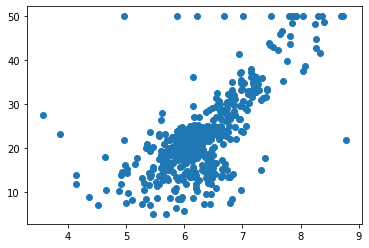

In [13]:
# 绘制散点图观看第五列特征与房价的关系
import matplotlib.pyplot as plt
x = boston['data'][:,5]
y = boston['target']
plt.scatter(x,y)
plt.show()

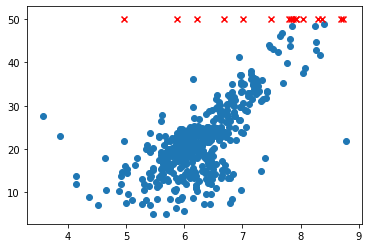

In [14]:
# 观察发现50被设置为房价的最大值
# 在数据的实际统计过程中凡是超过50房子的均被记录为50
# 去除这些离群值,将其标记为红色
x_save = x[y<50]
y_save = y[y<50]
x_remove = x[y==50]
y_remove = y[y==50]
plt.scatter(x_save,y_save)
plt.scatter(x_remove,y_remove,color='r',marker='x')
plt.show()

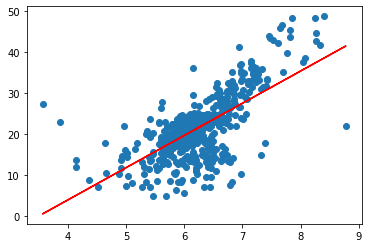

In [16]:
from handjob.SimpleLinerRegression import SimpleLinerRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_save, y_save, random_state=666, test_size=0.2 )
slr = SimpleLinerRegression()
slr.fit(x_train,y_train)
plt.scatter(x_save,y_save)
plt.plot(x_save,slr.predict(x_save),color='r')
plt.show()

In [17]:
from handjob.metrics import mean_absolute_error
from handjob.metrics import root_mean_squared_error
from handjob.metrics import mean_squared_error
from handjob.metrics import mean_squared_error
y_predict = slr.predict(x_test)

In [18]:
# RMSE
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [19]:
# MAE
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [20]:
# MSE
mean_squared_error(y_test, y_predict)

24.156602134387438

In [21]:
# R**2
r_square(y_test, y_predict)

0.6129316803937322

# 02 多元线性回归

## 公式实现

$\hat{y}^{(i)}=\theta_{0}+\theta_{1} X_{1}^{(i)}+\theta_{2} X_{2}^{(i)}+\ldots+\theta_{n} X_{n}^{(i)}$

$\boldsymbol{x}^{(i)}=\left(X_{1}^{(i)}, X_{2}^{(i)}, \ldots, X_{n}^{(i)}\right)$

$\theta=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right)^{T}$

------------------------------------------------------------------------------------------------------------------------------------


为了使$\theta$与$\boldsymbol{x}^{(i)}$ 匹配起来，如下，新增一个$X_{0}^{(i)}$:


$X^{(i)}=\left(X_{0}^{(i)}, X_{1}^{(i)}, X_{2}^{(i)}, \ldots, X_{n}^{(i)}\right)$,则：


$\hat{y}^{(i)}=\theta_{0} X_{0}^{(i)}+\theta_{1} X_{1}^{(i)}+\theta_{2} X_{2}^{(i)}+\ldots+\theta_{n} X_{n}^{(i)}, X_{0}^{(i)} \equiv 1$

------------------------------------------------------------------------------------------------------------------------------------
$X_{b}=\left(\begin{array}{ccccc}{1} & {X_{1}^{(1)}} & {X_{2}^{(1)}} & {\dots} & {X_{n}^{(1)}} \\ {1} & {X_{1}^{(2)}} & {X_{2}^{(2)}} & {\dots} & {X_{n}^{(2)}} \\ {\dots} & {} & {} & {\dots} \\ {1} & {X_{1}^{(m)}} & {X_{2}^{(m)}} & {\dots} & {X_{n}^{(m)}}\end{array}\right) \quad \quad \theta=\left(\begin{array}{c}{\theta_{0}} \\ {\theta_{1}} \\ {\theta_{2}} \\ {\dots} \\ {\theta_{n}}\end{array}\right)$


$\hat{y}=X_{b} \cdot \theta$

------------------------------------------------------------------------------------------------------------------------------------

目标：找到$\theta_{0}, \theta_{1}, \theta_{2}, \dots, \theta_{n}$ 使得$\sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$尽可能小

$\left(y-X_{b} \cdot \theta\right)^{T}\left(y-X_{b} \cdot \theta\right)$

多元线性回归的正规方程解

$\theta=\left(X_{b}^{T} X_{b}\right)^{-1} X_{b}^{T} y$



## Coding实现

In [1]:
# 加载数据集
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y<50]
y = y[y<50]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.2 )

In [2]:
from handjob.LinerRegression import LinerRegression
reg = LinerRegression()
reg.fit_normal(X_train, y_train)
reg.score(X_test, y_test)

0.8129794056212823

In [7]:
# sklearn 实现
from sklearn.linear_model import LinearRegression
reg = LinerRegression()
reg.fit_normal(X_train, y_train)
reg.score(X_test, y_test)

0.8129794056212823

## kNN回归

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn_rec = KNeighborsRegressor()
knn_rec.fit(X_train,y_train)
knn_rec.score(X_test,y_test)

0.5865412198300899